# 1D Fractal Interpolation, Hidden Interpolation and Integration 

## 1D Fractal Interpolation 
### Theory 


In one dimensional fractal interpolation, we assume the interpolation data to be in the form 
$$
P = \{ (x_i, y_i) ~|~  x_i, y_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
where $N$ is the number of points. Let us assume that $x_1 \leq x_2 \ldots \leq x_N$ and $I = [x_1, x_N]$ is the interpolation domain. The aim of the interpolatin is to find a continuous function $f : I \mapsto \mathbb{R}$ such that $f(x_i) = y_i, \; i = 1, 2, \ldots, N$. 



To solve this interpolation problem, we divide the interpolation domain $I$ into subintervals $I_n$ such that $I = \cup_{n = 1}^N I_n, \; I_n = [x_{n - 1}, x_{n}]$ 
and assume an iterated function system $\mathcal{I} = \{ w_n, I \times \mathbb{R}\}$ such that
$$
w_n(x, y) = \begin{bmatrix}
    a_{11, n} & 0 \\ 
    a_{21, n} & a_{22, n}
\end{bmatrix}
\begin{bmatrix}
    x \\ y 
\end{bmatrix} + 
\begin{bmatrix}
    b_{1,n} \\ b_{2, n} 
\end{bmatrix} \quad n = 1, 2, \ldots, N  
$$

Then, it can be shown that the interpolant $f$ is the fixed point of a function mapping $\mathcal{M}[f](x) = F_n(L_n^{-1}(x), f(L_n^{-1}(x)))$, i.e.$f = \lim_{n \mapsto \infty} T^n[f]$, where, 
$$
\begin{aligned}
L_n(x) &= a_{11, n} x + b_{1, n} \\ 
F_n(x, y) &= a_{21, n} x + a_{22, n}y + b_{2, n}
\end{aligned}
$$



Here the unknown coefficients of the transformation $w_n$ can be found using the boundary conditions.
$$
\begin{aligned}
    w_n({x_0, y_0}) &= (x_{n - 1}, y_{n - 1}) \\
    w_n({x_N, y_N}) &= (x_{n}, y_{n})
\end{aligned}
$$

Thus we have, 
$$
\begin{aligned}
    a_{11, n} x_0 + b_{1, n} &= x_{n - 1} \\ 
    a_{11, n} x_N + b_{1, n} &= x_{n}
\end{aligned}
$$
and 
$$
\begin{aligned}
    a_{21, n} x_0 + b_{2, n} &= y_{n - 1} - a_{22, n} y_0 \\ 
    a_{21, n} x_N + b_{1, n} &= y_{n} - a_{22, n} y_N 
\end{aligned}
$$

For each of $w_n$ we have the unknowns, $a_{11,n}, a_{21, n}, a_{22, n}, b_{1, n}, b_{2,n}$. We have five unknowns, but we only have four equations. Thus we choose $a_{22, n}$ as the free variable to solve the eqaution systems for the remaining unknowns. Thus, we can solve the following linear equations system for the unknowns $a_{11, n}, a_{21, n}, b_{1, n}, b_{2,n}$.
$$
\begin{bmatrix}
    x_0 & 1 \\ 
    x_N & 1 
\end{bmatrix}
\begin{bmatrix} 
    a_{11, n} & b_{1,n}\\ 
    a_{21, n} & b_{2, n}
\end{bmatrix} = 
\begin{bmatrix} 
    x_{n - 1} & y_{n - 1} - a_{22, n} y_0 \\ 
    x_{n} & y_{n} - a_{22, n} y_N 
\end{bmatrix}
$$

## Application 

In this section, we will apply the theoretical analysis presented in the previous section. 

### Regular Data Interpolation 
In this subsection, we will interpolate some regular data drawn from a smooth function. Below is an example script for one dimensional fractal interpolation for regular data. Note from the output that the fractal interpolation fits to the data. 

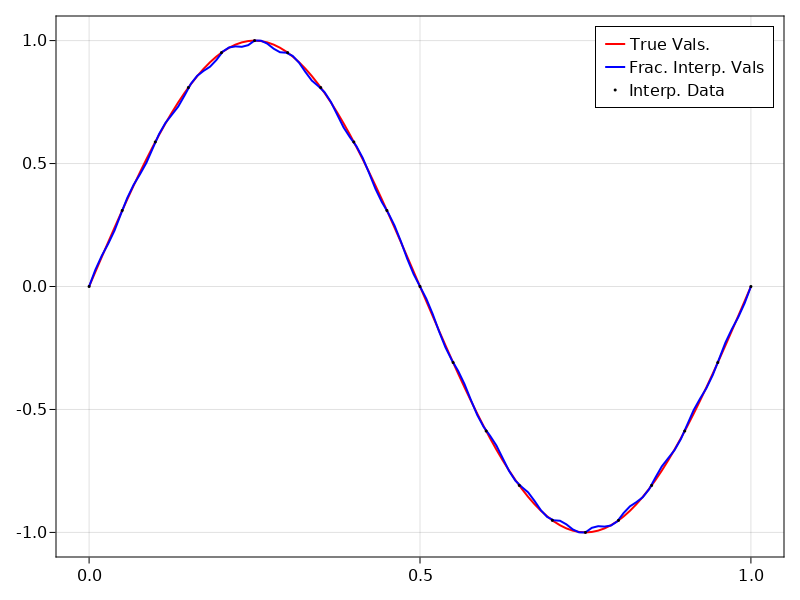

In [11]:
# Load the libraries 
using FractalTools 
using CairoMakie

# Construct a data set 
npts = 21                           # Number of data samples. 
f = FractalTools.sinusoid           # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.01                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Irregular Data Interpolation

In this subsection, we will interpolate irregular data that is drawn from a nonwhere differentiable function. The scripts below includes such a use case. Note from the figure that the interpolant fits well to the data. Beware also that the fractal interpolant reflects the irregularities that are inherent in the interpolation data. In this context, the fractal interpolant are natural alternatives of the spline interpolants for irregular complex data. 

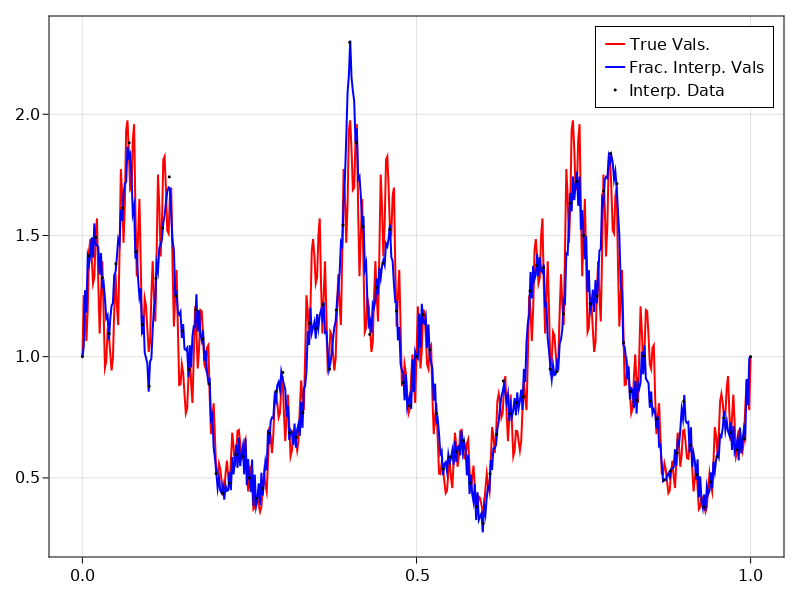

In [12]:
# Load the libraries 
using FractalTools 
using CairoMakie

# Construct a data set 
npts = 101                          # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Effect of Free Variable 

The free variables $a_{22,n}, \; n = 1, 2, \ldots, N$ have a direct impact on the performance of the interpolation. The variables are also scaling parameters, they determine the smoothness of the interpolant. The close the free variable to zero are, the smoother the resulting interpolants are. So, it the user's responsibility to specify the scaling parameter. As a rule of thumb, if the data is smooth then the free variables should be close to zero. If the data is irregular that manifest some self-repeating pattern, then the free variables should be close to one. Note that the lower and upper limits of the free variables are 0 and 1, respectively. To see the effect of free variable on the resulting interpolant, let us repeat the previous example, but with a different free variable. Note from the output figure that the interpolant does reflect the irregularity of the data but looks like a spline interpolant. 

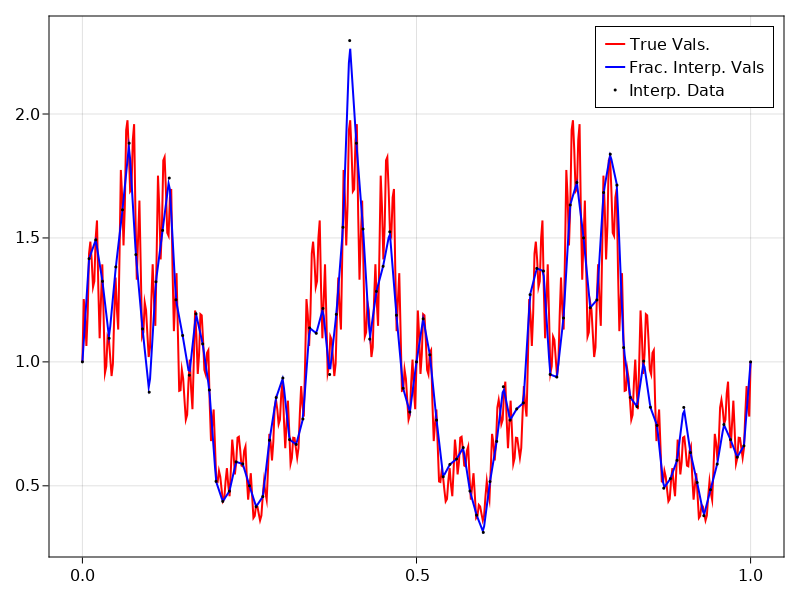

In [13]:
# Load the libraries 
using FractalTools 
using CairoMakie

# Construct a data set 
npts = 101                          # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.0001                                # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Mean Square Error versus Free Variable

Mean square eror (MSE) can be used as a metric to compare the performance of the interpolant. Let $e[k], k = 1, 2, \ldots, N$ be the sampled interpolation error. Then MSE of $e$ is 
$$
MSE_e = \dfrac{1}{N} \sum_{k = 1}^{N} e^2[k]
$$
In the previous subsection, we investigated the effect of the free variable. For a broader look at how the free variable can effect the interpolation MSE let us look at following script.Note from the figure that as the scaling parameter goes to zero, the MSE goes to zero. 

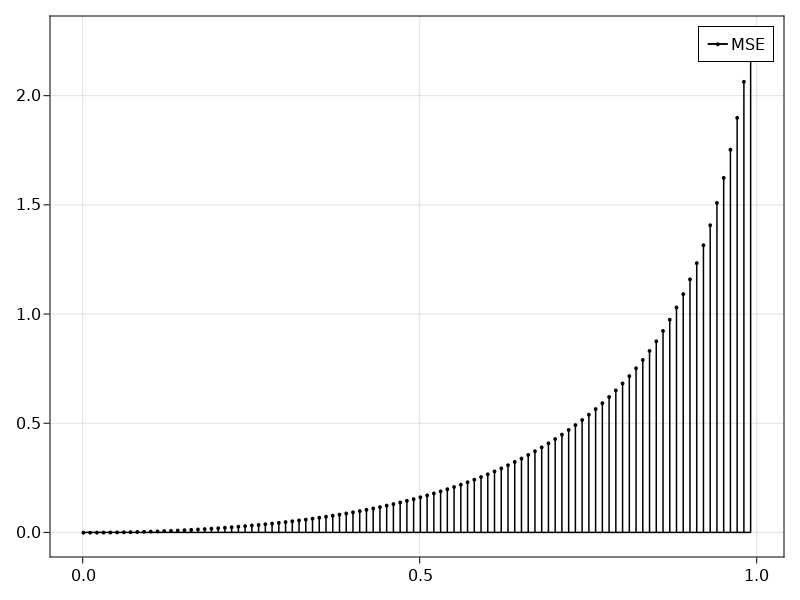

In [14]:
# Construct interpolation data 
f = FractalTools.sinusoid
npts = 21 
domain = [[0.], [1.]]   
pts = getdata(f, domain, npts)

# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = f.(xt)

# Compute errors 
freevars = 0.001 : 0.01 : 0.999
mse = map(freevars) do freevar 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

However, for the irregular data the MSE does not goes to zero even if the free variable goes to zero. The reason is that as the free variable goes to zero, the fractal interpolation approches to some kind of (maybe cubic, quadratic, etc.) spline interpolation. Since the resulting interpolant becomes so smooth such that it can no longer reflect the irregularity of the data, the MSE does not approach to zero. 

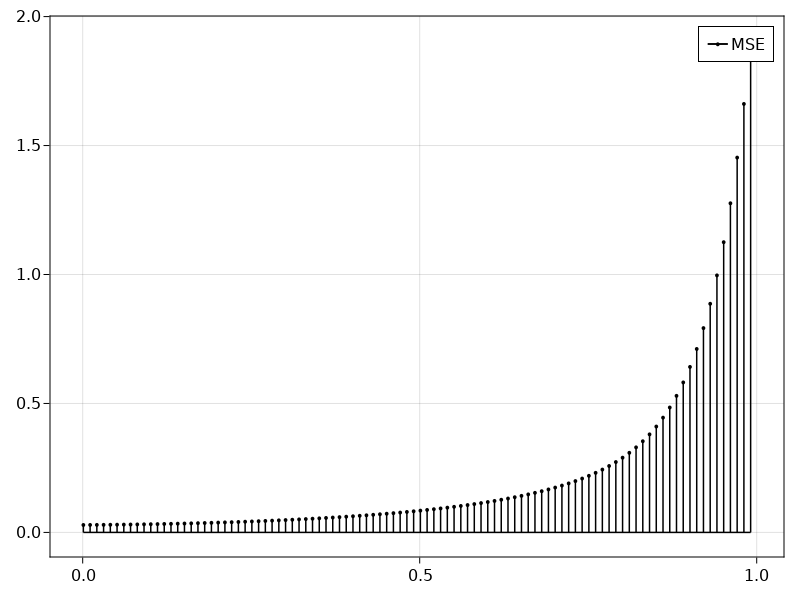

In [15]:
# Construct interpolation data 
f = FractalTools.wen
npts = 51
domain = [[0.], [1.]]   
pts = getdata(f, domain, npts)

# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = f.(xt)

# Compute errors 
freevars = 0.001 : 0.01 : 0.999
mse = map(freevars) do freevar 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

### Comparison with Spline Interpolation 

In this section, we compare the performance of the fractal interpolation to that of spline interpolation. The following script illustrates that the spline interpolation is not good choose for the interpolation of irregular data. 

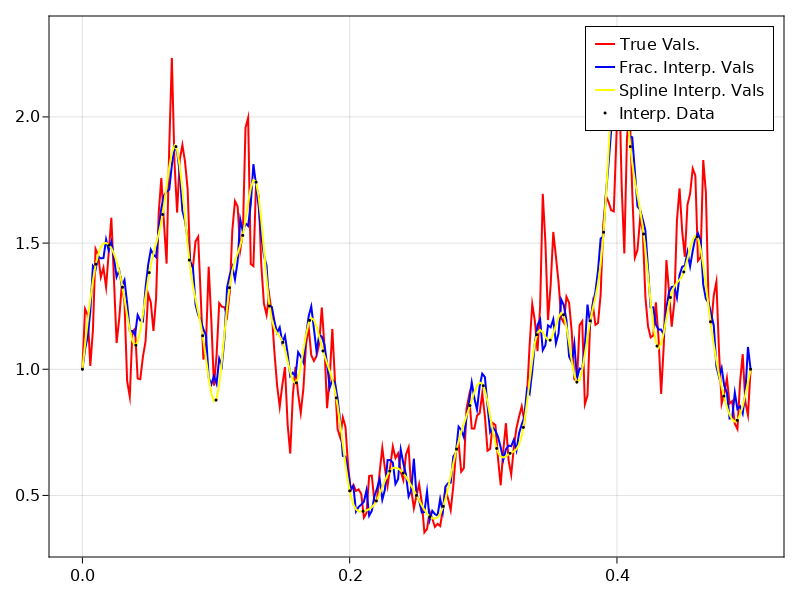

In [16]:
# Load the libraries 
using FractalTools 
using CairoMakie
import Interpolations 

# Construct a data set 
npts = 51                           # Number of data samples. 
f = FractalTools.wen                # The function to be sampled for data
domain = [[0.], [0.5]]              # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, Interp1D(freevar))    # Interpolant

x = getindex.(pts, 1)
xr = range(x[1], x[end], step=x[2] - x[1])
yr = f.(xr)
spline_interp = Interpolations.CubicSplineInterpolation(xr, yr)

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = f.(xt)          # True values 
interpvals = interp.(xt)   # Interpolation values 
spline_interpvals = spline_interp.(xt)  # Spline interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
lines!(xt, spline_interpvals, linewidth=2, color=:yellow, label="Spline Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Mean Square Error versus Number of Points 

The number of points also a direct impact on the performance of the interpolation domain. We expect that as the number of points in a given interpolation domain increases, the MSE of the interpolation decreases. This expectation is observed from the figure obtained in the following script. 

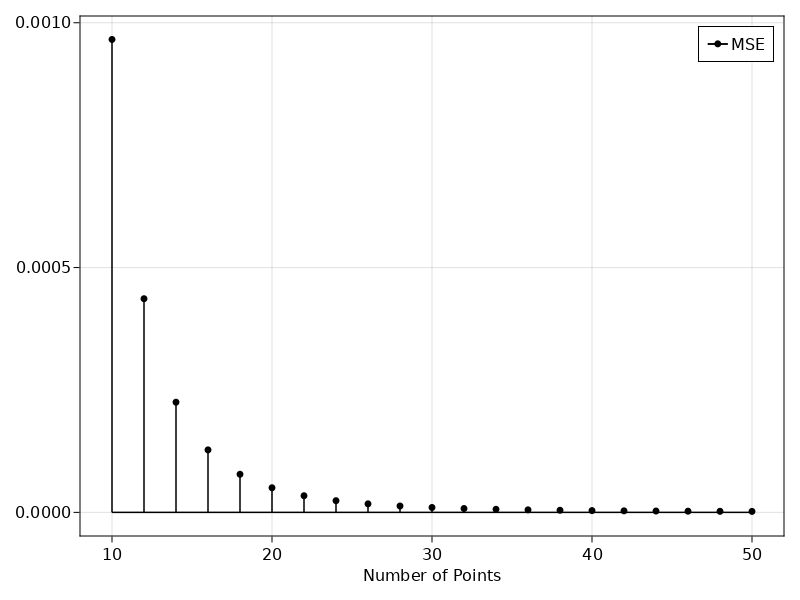

In [17]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using CairoMakie

# Construct interpolation data 
f = FractalTools.sinusoid
domain = [[0.], [1.]]
freevar = 0.001                
npts = 10 : 2 : 50

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = f.(xt)

# Compute errors 
mse = map(npts) do npt 
    # Construct interpolation data 
    pts = getdata(f, domain, npt)

    # Construct interpolation 
    interp = interpolate(pts, Interp1D(freevar))
    ival = interp.(xt)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Points") 
stem!(ax, npts, mse, color=:black, label="MSE")
axislegend(ax)
fig 


### Mean Square Error versus Number of Iterations

Apart from the free variable, the number of iterations also has a direct on the performance of the interpolation. Theoretically, the interpolant is the fixed point of the mapping $M[f]$. This implies the number of iterations must be infinite. However, this is not applicable. So, the the iterations are carried for a finite value, say $K$, So, the returned interpolant $f$, is actually, 
$$
f = T^{K}[f_0]
$$
where $f_0$ is the initial function, whose default is the zero function $f_0(x) = 0, \; \forall x$. Interestingly, after the second iteration, the interpolation MSE does not change much. 

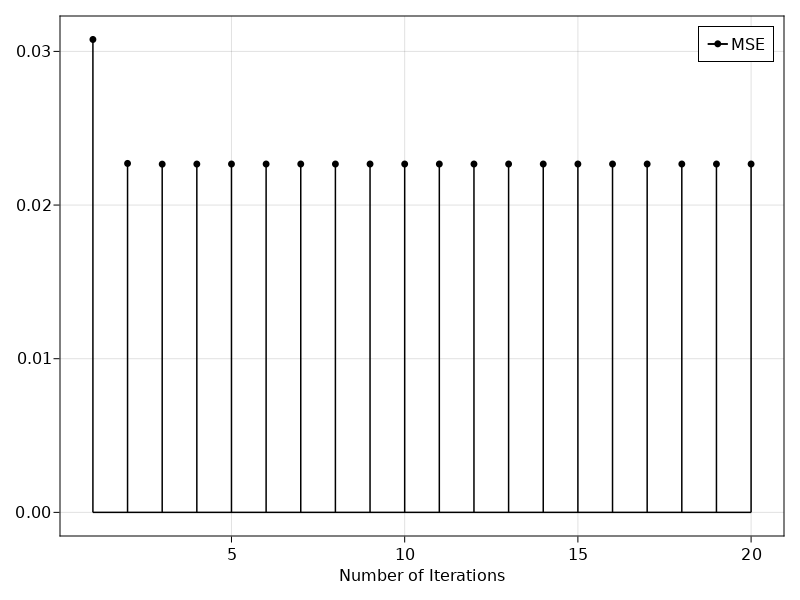

In [18]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using CairoMakie

# Construct interpolation data 
f = FractalTools.wen
domain = [[0.], [1.]]
freevar = 0.1                
npts = 101
niters = 1 : 20

# Construct interpolation data 
pts = getdata(f, domain, npts)

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = f.(xt)

# Compute errors 
mse = map(niters) do niter 
    # Construct interpolation 
    interp = interpolate(pts, Interp1D(freevar), niter=niter)
    ival = interp.(xt)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Iterations") 
stem!(ax, niters, mse, color=:black, label="MSE")
axislegend(ax)
fig 


## 1D Hidden Fractal Interpolation 
### Theory 

In one dimensional hidden fractal interpolation, the data is assumed to be given in the form 
$$
P = \{(x_i, y_i, z_i) ~|~ x_i, y_i, z_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
where $N$ is the number of points. Assume that $x_1 \leq x_2 \leq \ldots \leq x_N$ and $I = [x_1, x_N]$ is the interpolation domain. The aim of the interpolation is to find a continuous function $f: I \mapsto \mathbb{R}^2$ such that $f(x_i) = [x_i, y_i], \; i = 1, 2, \ldots, N$. 

Note that $f$ is a vector valued function. Let $f$ be decomposed into two functions $f_1 : I \mapsto \mathbb{R}$ and $f_2 : I \mapsto \mathbb{R}$. In this case, one can consider the interpolation of data points 
$$
P_1 = \{ (x_i, y_i ) ~|~ x_i, y_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
Then, the variables $z_i$ can be thought of as free variables. Thus, given that we have a set of points $P_1$ and want to find an interpolant $f_1(x_i) = y_i$, instead of trying to find $f_1$ directly, we can go up one dimension by transforming out data set from $P_1$ to $P$, find and interpolant $f$ and project the interpolant $f$ back to one dimension to find $f_1$.

The steps to solve this problem is very similar to the case in one dimensional fractal interpolation. In the case of hidden fractal interpolation, however, the dimension is increased which implies the transformation of the IFS also changes. 

Again we divide the interpolation domain $I = [x_0, x_N]$ into to subintervals $I_n = [x_{n -1}, x_{n}]$ such that $I = \cup_{i = 1}^N I_n$. The transformations $w_n$ of the IFS take the form 
$$
w_n(x, y, z) = 
\begin{bmatrix}
    a_{11, n} & 0 & 0 \\ 
    a_{12, n} & a_{22, n} & a_{23, n} \\ 
    a_{31, n} & a_{32, n} & a_{33, n}
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ z 
\end{bmatrix} + 
\begin{bmatrix}
    b_{1, n} \\ 
    b_{2, n} \\ 
    b_{3, n}
\end{bmatrix}, \quad n = 1, 2, \ldots, N 
$$
Then, the it can be shown that the interpolant $f$ is the fixed point of  functional mapping $\mathcal{M}[f](x) = F_n(L_n^{-1}(x), f(L_n^{-1}(x)))$, i.e. $f = \lim_{n \mapsto \infty} T^n[f]$, where, 
$$
\begin{aligned}
    L_n(x) &= a_{11, n}x + b_{1, n} \\ 
    F_n(x, y, z) &= \begin{bmatrix} 
        a_{21, n} & a_{22, n} & a_{23, n} \\ 
        a_{31, n} & a_{32, n} & a_{33, n} \\ 
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y \\ z 
    \end{bmatrix} + 
    \begin{bmatrix}
        b_{2, n} \\ 
        b_{3, n}
    \end{bmatrix}
\end{aligned}
$$

Here, the unknown coefficients of the transformation $w_n$ can be found using the boundary conditons, 
$$
\begin{aligned}
    w_n(x_0, y_0) &= (x_{n - 1}, y_{n - 1}, z_{n - 1}) \\ 
    w_n(x_N, y_N) &= (x_{n}, y_{n}, z_{n})
\end{aligned}
$$

Thus, we have, 
$$
\begin{aligned}
    a_{11, n} x_0 + b_{1, n} &= x_{n - 1} \\ 
     a_{11, n} x_N + b_{1, n} &= x_{n} \\ 
\end{aligned}
$$
$$
\begin{aligned}
    a_{21, n} x_0 + b_{2, n} &= y_{n - 1} - a_{22, n} y_0 - a_{23, n} z_0 \\ 
     a_{21, n} x_N + b_{2, n} &= y_{n} - a_{22, n} y_N - a_{23, n} z_N  \\ 
\end{aligned}
$$
$$
\begin{aligned}
    a_{31, n} x_0 + b_{3, n} &= z_{n - 1} - a_{32, n} y_0 - a_{33, n} z_0 \\ 
     a_{31, n} x_N + b_{3, n} &= z_{n} - a_{32, n} y_N - a_{33, n} z_N  \\ 
\end{aligned}
$$


The above equation system may be written in the following form, 
$$
\begin{bmatrix}
x_0 & 1 \\ 
x_N & 1 
\end{bmatrix}
\begin{bmatrix}
a_{11, n} & a_{21, n} & a_{31, n} \\ 
b_{1, n} & b_{2,n} & b_{3, n} 
\end{bmatrix} = 
\begin{bmatrix}
x_{n - 1} & y_{n - 1} - a_{22, n} y_0 - a_{23,n} z_0 & z_{n - 1} - a_{32, n} y_0 - a_{33, n} z_0 \\ 
x_{n}     & y_{n} - a_{22,n}y_n - a_{23,n} z_N       & z_{n} - a_{32, n}y_N - a_{33,n} z_N
\end{bmatrix}
$$

### Application 

In this section, we will apply the theoretical analysis presented in the previous section. 

#### Regular Data Interpolation 

In this subsection, we will interpolate some regular data drawn from a smooth function. Below is the script for onte dimensional hidden fractal interpolation.

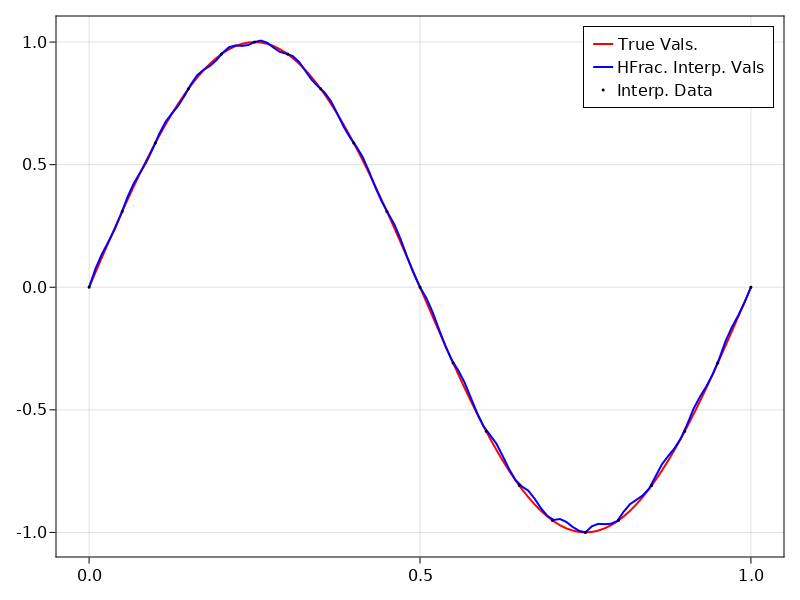

In [19]:
# Load the libraries 
using FractalTools 
using CairoMakie 

# Construct a data set 
npts = 21                           # Number of data samples. 
ff(x) = [                            # The function to be sampled for data
    FractalTools.sinusoid(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(ff, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.01                                  # Free variable
interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(ff.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 

#### Irregular Data Interpolation 

In this subsection, we will interpolate irregular data that is drawn from a nowhere differntiable function. Note from the figure from the script below that the fractal interpolant reflects irregular structure of the data. This feature of fractal interpolation makes it natural candidates for the interpolation of data that has inherent irregularities. 

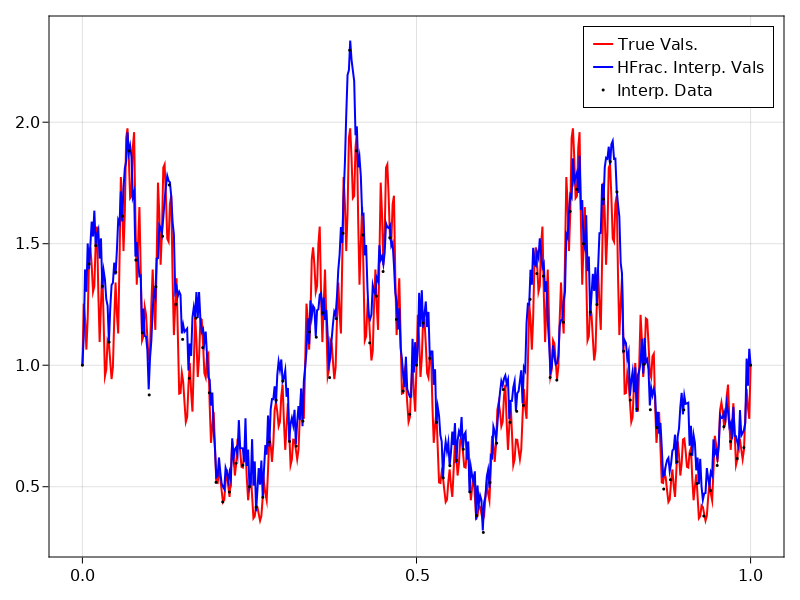

In [24]:
# Load the libraries 
using FractalTools 
using CairoMakie

# Construct a data set 
npts = 101                           # Number of data samples. 
func(x) = [                            # The function to be sampled for data
    FractalTools.wen(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(func, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, HInterp1D(freevar * ones(2,2)), niter=20)    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(func.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 

#### Effect of Free Variable 

The fractal interpolation presents flexibility in data interpolation. Free variables makes this flexibilty available. Thus, one can adjust the free variables so that some certain property(such as the smoothness) of the interpolant can be adjusted. In case of one dimensional fractal interpolation, one can specify a single free variable per transformation. However, hidden fractal interpolation presents much more interpolation flexibility by allowing four free variables per transformation. Let us repeat the previous example but with different free variables. 

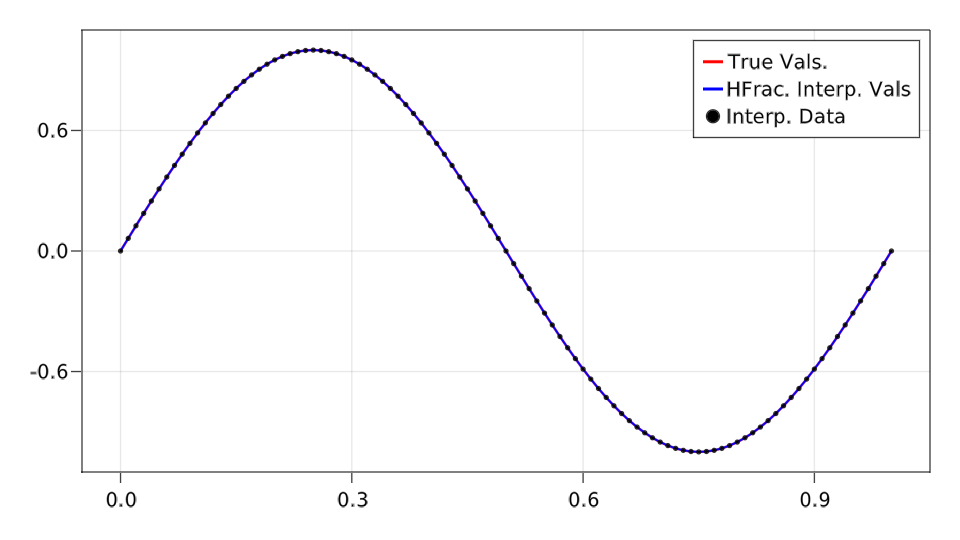

In [ ]:
# Load the libraries 
using FractalTools 
using CairoMakie 

# Construct a data set 
npts = 101                          # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.sinusoid(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = rand(2, 2) * 0.001                       # Free variable
interp = interpolate(pts, HInterp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(f.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 


### Mean Square Error versus Free Variable

Mean square eror (MSE) can be used as a metric to compare the performance of the interpolant. Let $e[k], k = 1, 2, \ldots, N$ be the sampled interpolation error. Then MSE of $e$ is 
$$
MSE_e = \dfrac{1}{N} \sum_{k = 1}^{N} e^2[k]
$$
In the previous subsection, we investigated the effect of the free variable. For a broader look at how the free variable can effect the interpolation MSE let us look at following script.Note from the figure that as the scaling parameter goes to zero, the MSE goes to zero. 

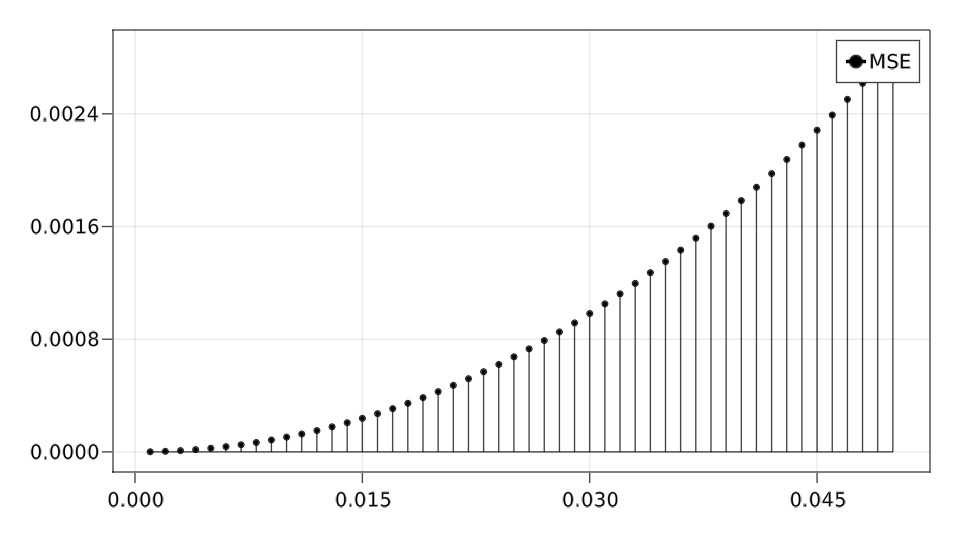

In [ ]:
# Construct a data set 
npts = 101                          # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.sinusoid(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 


# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = getindex.(f.(xt),1)

# Compute errors 
freevars = 0.001 : 0.001 : 0.05
mse = map(freevars) do freevar 
    interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))
    ival = getindex.(interp.(xt),1)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

However, for the irregular data the MSE does not goes to zero even if the free variable goes to zero. The reason is that as the free variable goes to zero, the fractal interpolation approches to some kind of (maybe cubic, quadratic, etc.) spline interpolation. Since the resulting interpolant becomes so smooth such that it can no longer reflect the irregularity of the data, the MSE does not approach to zero. 

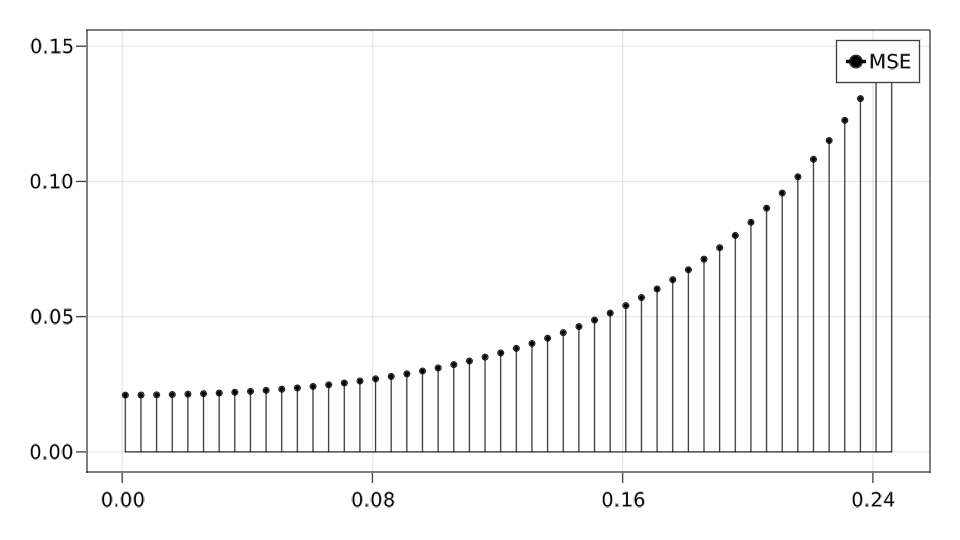

In [ ]:
# Construct a data set 
npts = 101                          # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.wen(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 


# Construct some test data 
ntpts = 5 * npts 
tpts = getdata(domain, ntpts)
xt = getindex.(tpts, 1)

# Compute true values 
fval = getindex.(f.(xt),1)

# Compute errors 
freevars = 0.001 : 0.005 : 0.25
mse = map(freevars) do freevar 
    interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))
    ival = getindex.(interp.(xt),1)
    sum((fval - ival).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1,1] = Axis(fig) 
plt = stem!(ax, freevars, mse, color=:black, markersize=5, 
    xlabel="Free Variables", label="MSE")
axislegend(ax)
fig 

### Comparison with Spline Interpolation 

In this section, we compare the performance of the fractal interpolation to that of spline interpolation. The following script illustrates that the spline interpolation is not good choose for the interpolation of irregular data. 

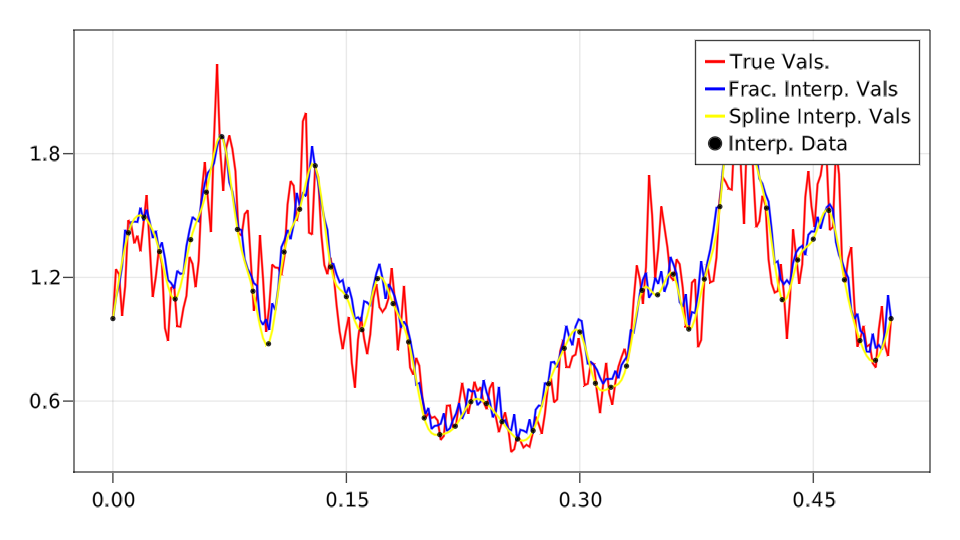

In [ ]:
# Load the libraries 
using FractalTools 
using CairoMakie 
import Interpolations 

# Construct a data set 
npts = 51                           # Number of data samples. 
f(x) = [FractalTools.wen(x),
        FractalTools.parabol(x)]    # The function to be sampled for data
domain = [[0.], [0.5]]              # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))    # Interpolant

x = getindex.(pts, 1)
xr = range(x[1], x[end], step=x[2] - x[1])
yr = getindex.(f.(xr),1)
spline_interp = Interpolations.CubicSplineInterpolation(xr, yr)

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(f.(xt),1)          # True values 
interpvals = getindex.(interp.(xt),1)   # Interpolation values 
spline_interpvals = spline_interp.(xt)  # Spline interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="Frac. Interp. Vals")
lines!(xt, spline_interpvals, linewidth=2, color=:yellow, label="Spline Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 

### Mean Square Error versus Number of Points 

The number of points also a direct impact on the performance of the interpolation domain. We expect that as the number of points in a given interpolation domain increases, the MSE of the interpolation decreases. This expectation is observed from the figure obtained in the following script. 

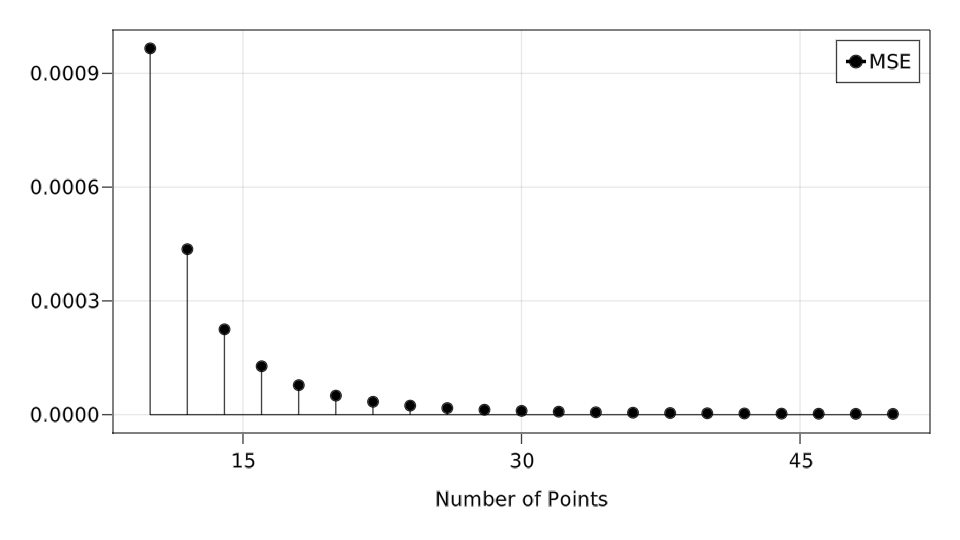

In [ ]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using CairoMakie 

# Construct interpolation data 
f(x) = [FractalTools.sinusoid(x),
        FractalTools.parabol(x)]
domain = [[0.], [1.]]
freevar = 0.001                
npts = 10 : 2 : 50

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = getindex.(f.(xt),1)

# Compute errors 
mse = map(npts) do npt 
    # Construct interpolation data 
    pts = getdata(f, domain, npt)

    # Construct interpolation 
    interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))
    ival = getindex.(interp.(xt),1)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Points") 
stem!(ax, npts, mse, color=:black, label="MSE")
axislegend(ax)
fig 


### Mean Square Error versus Number of Iterations

Apart from the free variable, the number of iterations also has a direct on the performance of the interpolation. Theoretically, the interpolant is the fixed point of the mapping $M[f]$. This implies the number of iterations must be infinite. However, this is not applicable. So, the the iterations are carried for a finite value, say $K$, So, the returned interpolant $f$, is actually, 
$$
f = T^{k}[f_0]
$$
where $f_0$ is the initial function, whose default is the zero function $f_0(x) = 0, \; \forall x$. Interestingly, after the second iteration, the interpolation MSE does not change much. 

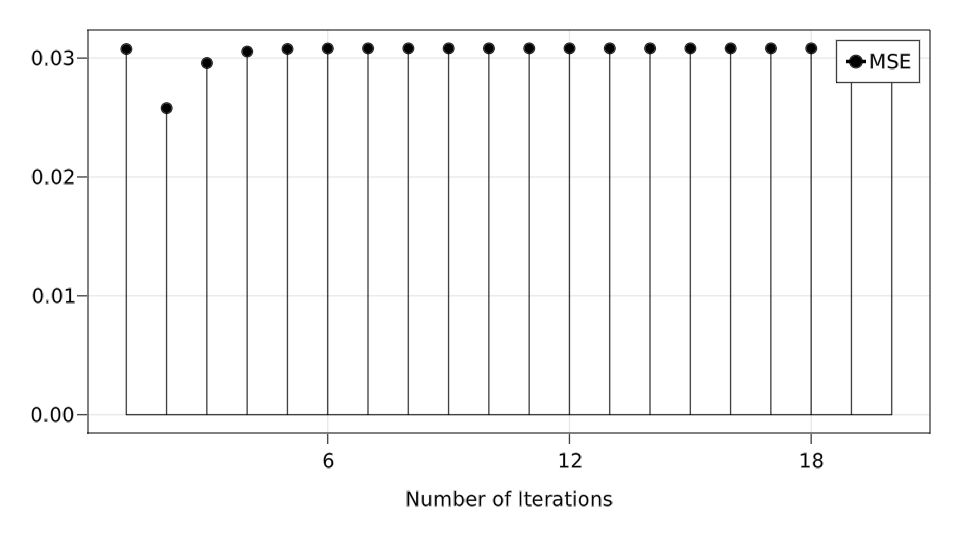

In [ ]:
# This file investigates mean square error (MSE) with respect to number of interpolation points in 1D interpolation 

using FractalTools 
using CairoMakie 

# Construct interpolation data 
f(x) = [FractalTools.wen(x),
        FractalTools.parabol(x)]
domain = [[0.], [1.]]
freevar = 0.1          
npts = 101
niters = 1 : 20

# Construct interpolation data 
pts = getdata(f, domain, npts)

# Construct test data 
ntpts = 5 * npts[end]
xt = collect(range(only(first(domain)), only(last(domain)), length=ntpts))
fval = getindex.(f.(xt),1)

# Compute errors 
mse = map(niters) do niter 
    # Construct interpolation 
    interp = interpolate(pts, HInterp1D(freevar * ones(2,2)), niter=niter)
    ival = getindex.(interp.(xt),1)

    # Compute error
    sum((fval - ival ).^2) / ntpts
end 

# Plot mse 
fig = Figure() 
ax = fig[1, 1] = Axis(fig, xlabel="Number of Iterations") 
stem!(ax, niters, mse, color=:black, label="MSE")
axislegend(ax)
fig 


**NOTE** : Tne number of iterations does not effective convergence

## 1D Fractal Integration

### Theory 

It is also possible to calculate the definite integrals of the fractal interpolation functions over the interpolation domain. The crucial result here is that the value of the integrals does not depend on the explicit formula of the interpolation function, but depends on the coefficients of the transformations that are used to construct the interpolant. 


We first start with
$$
\begin{aligned}
  I =  \int_{\Omega} f(x)dx = \int_{x_0}^{x_N} f(x) dx
\end{aligned}
$$
where $f$ is the fractal interpolation function, i.e. the interpolant and $\Omega = [x_1, x_N]$ is the interpolation domain. Since $f(x)$ is the fixed point of $Tf$, we have $f(x) = Tf(x)$. Then,
$$
\begin{aligned}
    I
    = \int_{x_0}^{x_N} Tf(x) dx
\end{aligned}
$$

Since $Tf(x) = F_n(L_n^{-1}(x), f(L_n^{-1}))$, where, in case of one dimensional integration, 
$$
\begin{aligned}
    L_n(x) &= a_{11,n} x + b_{1,n} \\
    F_n(x, y) &= a_{21,n} x + a_{22,n} y + b_{2,n}  \\
\end{aligned}
$$
we have,
$$
\begin{aligned}
    I
    = \int_{x_0}^{x_N} \left( a_{21,n}L_n^{-1}(x) +  a_{22,n}f(L_n^{-1}(x)) +  b_{2,n}\right) dx
\end{aligned}
$$

We can divide integral $I$ into multiple subintervasl $I_n$,
$$
\begin{aligned}
    I  
    = \sum_{n=1}^N \int_{x_{n-1}}^{x_n} \left(  a_{21,n}L_n^{-1}(x) +  a_{22,n}f(L_n^{-1}(x)) +  b_{2,n}\right) dx
    = \sum_{n=1}^N \int_{\Omega_n} \left(  a_{21,n}L_n^{-1}(x) +  a_{22,n} f(L_n^{-1}(x)) +  b_{2,n} \right) dx
\end{aligned}
$$

To make the right hand side of the above equation look like the left hand side, we need to apply a suitable transformation. That is, we need to transform the integral $\int_{I_n}$ over the subinterval $I_n$ to the interpolation interval $I$. 

 We have the following equality for the definite integrals.
$$
  \begin{aligned}
      I
      = \int_{\Omega_n} h(x) dx
      = \int_{\Omega} h(L(\bar{x})) |J_L|d \bar{x} 
  \end{aligned}
$$
where $|J_L|$ is the determinant of the Jacobian of the transformation $L$.

Using the note given above, we can write 
$$
\begin{aligned}
    I &= \sum_{n=1}^N \int_{\Omega} \left(  a_{21,n} \bar{x} +  a_{22,n} f(\bar{x}) +  b_{2,n}\right) |J_{L_n}| d \bar{x} \\
        &= \sum_{n=1}^N  |J_{L_n}| \int_{\Omega} \left( a_{21,n} \bar{x} +  b_{2,n}\right)  d \bar{x}  +
        \sum_{n=1}^N |J_{L_n}| \int_{\Omega} \left(  a_{22,n} f(\bar{x}) \right)  d \bar{x} \\
        &= \sum_{n=1}^N |J_{L_n}| \int_{\Omega} \left(  a_{21,n}\bar{x} + b_{2,n}\right)  d \bar{x}  +
        \left( \sum_{n=1}^N  |J_{L_n}| a_{22,n}\right)  \int_{\Omega} f(\bar{x})  d \bar{x} \\
        &= \sum_{n=1}^N |J_{L_n}| \int_{\Omega} \left(  a_{21,n}\bar{x} +  b_{2,n}\right)  d \bar{x}  +
         \left( \sum_{n=1}^N |J_{L_n}|  a_{22,n} \right) I \\
\end{aligned}
$$
from which we have, 
$$
    I = \dfrac{K_1}{1-K_2}
$$
where 
$$
    \begin{aligned}
    K_1 &= \sum_{n=1}^N  a_{11, n} \int_{I} \left(  a_{21,n}\bar{x} + b_{2,n} \right) d \bar{x} \\
    K_2 &= 1 - \sum_{n=1}^N a_{11, n} a_{22,n}
    \end{aligned}
$$
where $|J_{L_n}| = a_{11,n}$ is used. It worths pointing out that the value $I$ of the integration depends on just the coefficients of the transformations, not on the explicit expression of the interpolation function $f$.

### Application 

In this section, some numerical integral examples will be evaluated.

#### Integration Error 

In this application, we will evaluate the integral of the interpolant over a fixed interpolation domain. 

In [ ]:
using FractalTools 
using CairoMakie 
using QuadGK
using DataFrames

# Construct a data set 
npts = 1001                           # Number of data samples. 
f = FractalTools.sinusoid           # The function to be sampled for data
domain = [[0.], [π]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Compute integral
intfrac = integrate(pts, Interp1D(0.0001))

# Compute using quadqk 
intquad = quadgk(f, domain[1][1], domain[2][1]) |> first 

# Compute error 
relerr = abs(intfrac - intquad) / abs(intquad) * 100 

# Display 
DataFrame(
    Name = ["Fractal Integral", "QuadGK Integral", "Error(%)"], 
    Value = [intfrac, intquad, relerr], 
) 

,Name,Value
,String,Float64
1,Fractal Integral,0.0588199
2,QuadGK Integral,0.058938
3,Error(%),0.200311


#### Running Integration

Let consider the function 
$$ 
f(t) = \sin(t)
$$
and its running integral 
$$
g(t) = \int_{0}^t f(\tau)d\tau = 1 - \cos(t)
$$
In the example below, we will evaluate the runniing integration $g(t)$ using both fractal integration method and quadgk method. 

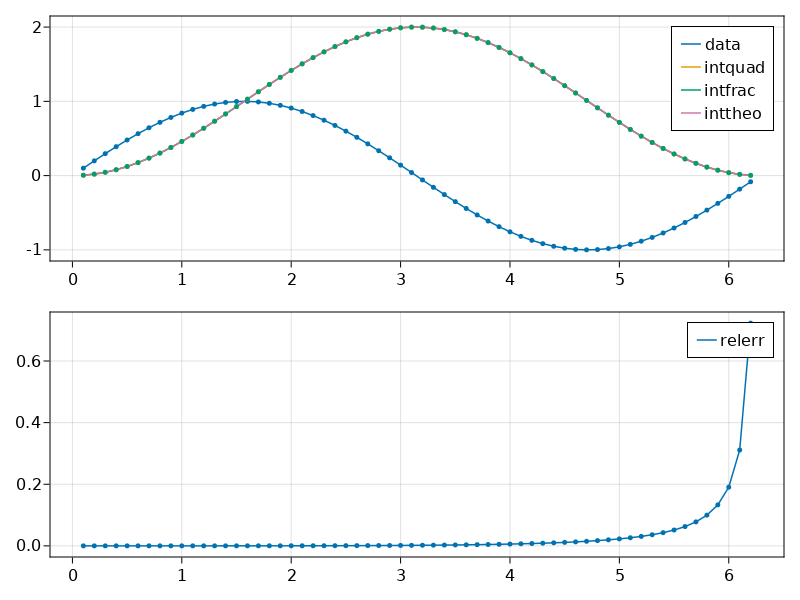

In [ ]:
using FractalTools
using QuadGK 
using CairoMakie

# Define integral 
intquadf(t) = quadgk(sin, 0, t) |> first 

# Define integration 
intfracf(t) = integrate(getdata(sin, [[0.], [t]], 101), Interp1D(0.0001))

# Evaluations 
td = collect(0.1 : 0.1 : 2π) 
intvalfrac = intfracf.(td)
intvalquad = intquadf.(td) 
intvaltheo = 1 .- cos.(td)
relerr = abs.(intvalfrac - intvalquad) ./ abs.(intvalquad) * 100

# Plots 
fig = Figure() 
fig[1, 1] = ax1 = Axis(fig)
lines!(ax1, td, sin.(td), label="data")
lines!(ax1, td, intvalquad, label="intquad")
lines!(ax1, td, intvalfrac, label="intfrac")
lines!(ax1, td, intvaltheo, label="inttheo")
scatter!(ax1, td, sin.(td), markersize=5)
scatter!(ax1, td, intvalquad, markersize=5)
scatter!(ax1, td, intvalfrac, markersize=5)
fig[2, 1] = ax2 = Axis(fig) 
lines!(ax2, td, relerr, label="relerr")
scatter!(ax2, td, relerr, markersize=5)
axislegend(ax1)
axislegend(ax2)
fig 


## 1D Fractal Hidden Integration 

### Theory 
It is also possible to evaluate definite integral of a hidden fractal interpolant. Again, the important point here is that given a set of points scattered in an interpolation domain, the integral can be evaluated by using just the coefficients of the transformations of the IFS of the interpolation. 

Recall that for one dimensional fractal interpolation the interpolant $f: \Omega \mapsto \mathbb{R}^{2}, \; f(x) = [y, x]$, where $\Omega$ is the interpolation domain. We can decompose $f$ such that
$$
f(x) = 
\begin{bmatrix} 
    f_1(x) \\ 
    f_2(x)
\end{bmatrix} = 
\begin{bmatrix} 
    y \\ 
    z
\end{bmatrix} \quad \Rightarrow \quad f_1(x) = y, \quad f_2(x) = z 
$$

We want to evaluate, 
$$
I = \int_{\Omega} f(x) dx
$$
Since, $f(x)$ is the fixed point of the $Tf(x) = F_n(L_n^{*1}(x), f(L_n^{-1}(x)))$ where 
$$
\begin{aligned} 
L_n(x) &= a_{11, n} x + b_{1n} \\ 
F_n(x, y, z) &= \begin{bmatrix} 
a_{21, n} & a_{22, n} & a_{23, n} \\ 
a_{31, n} & a_{32, n} & a_{33, n} \\ 
\end{bmatrix}
\begin{bmatrix} 
    x \\ 
    y \\ 
    z 
\end{bmatrix} +  
\begin{bmatrix}
    b_{2n} \\ 
    b_{3n} 
\end{bmatrix}
\end{aligned}
$$

Thus, we have, 
$$
I 
= \int_{\Omega} f(x) dx 
= \int_{\Omega} Tf(x) dx 
= \begin{bmatrix}
\int_{\Omega} f_1(x) dx  \\[0.25cm] 
\int_{\Omega} f_2(x) dx 
\end{bmatrix}
= \begin{bmatrix}
\int_{\Omega} Tf_1(x) dx  \\[0.25cm]
\int_{\Omega} Tf_2(x) dx 
\end{bmatrix}
= \begin{bmatrix}
I_1  \\[0.25cm]
I_2
\end{bmatrix}
$$
where
$$
Tf(x) = 
\begin{bmatrix} 
    Tf_1(x) \\[0.25cm]  
    Tf_2(x)  
\end{bmatrix}
$$
We have, 
$$
Tf(x)  = F_n(L_n^{-1}(x), f(L_n^{-1}(x))) = 
\begin{bmatrix}
a_{21, n} & a_{22, n} & a_{23, n} \\ 
a_{31, n} & a_{32, n} & a_{33, n} 
\end{bmatrix}
\begin{bmatrix} 
    L_n^{-1}(x) \\ 
    f(L_n^{-1}(x))
\end{bmatrix} + 
\begin{bmatrix} 
    b_{2n} \\ 
    b_{3n}  
\end{bmatrix}
$$
Thus, we have, 
$$
\begin{aligned} 
Tf_1(x) &= a_{21,n} L_n^{-1}(x) + [ a_{22, n},  a_{23,n} ]^T f(L_n^{-1}(x)) + b_{2n} \\[0.25cm] 
Tf_2(x) &=a_{31,n} L_n^{-1}(x) + [ a_{32, n},  a_{33,n} ]^T f(L_n^{-1}(x)) + b_{3n} 
\end{aligned}
$$

Hence for $I_1$, we have, 
$$
I_1 = \int_{\Omega} Tf_1(x) dx = \sum_{n = 1}^N \int_{\Omega_n} \left( a_{21,n} L_n^{-1}(x) + [ a_{22,n},  a_{23,n} ]^T f(L_n^{-1}(x)) + b_{2n} \right) dx
$$
Using the transformation 
$$
\bar{x} = L_n^{-1}(x) \quad \Rightarrow \quad x = L_n(\bar{x})
$$
and we can write 
$$
\int_{\Omega_n} g(x) dx = \int_{\Omega} g(L_n(\bar{x})) |J_{L_n}| d\bar{x}
$$

Hence, we have 
$$
\begin{aligned} 
    I_1 
    &= \sum_{n = 1}^N \int_{\Omega} \left( a_{21, n}\bar{x} + [a_{22,n}, a_{23, n} ]^T f(\bar{x}) + b_{2n} \right) |J_{L_n}| d\bar{x} \\ 
    &= \sum_{n = 1}^N \int_{\Omega} \left( a_{21, n}\bar{x} + a_{22,n} f_1(\bar{x}) +  a_{23, n} f_2(\bar{x}) + b_{2n} \right) |J_{L_n}| d\bar{x} \\ 
    &= \left( \sum_{n = 1}^N a_{22, n} |J_{L_n}| \right) \int_{\Omega}f_1(\bar{x}) d\bar{x} +  \left( \sum_{n = 1}^N a_{23, n} |J_{L_n}| \right) \int_{\Omega}f_2(\bar{x}) d\bar{x} + \sum_{n = 1}^N |J_{L_n}| \left( \int_{\Omega} a_{21,n} \bar{x} + b_{2n} d\bar{x}  \right)
\end{aligned}
$$

Since
$$
|J_{L_n}| = a_{11,n}
$$
and $\Omega = [x_0, x_N]$, 
$$
\int_{x_0}^{x_N} a_{11,n} \left( a_{21,n} \bar{x} + b_{2n} \right) d\bar{x} = a_{21,n} a_{11,n} \dfrac{x_N^2 - x_0^2}{2} + b_{2n} a_{11,n} (x_N - x_0) = a_{21,n} a_{11,n} K_1 + b_{2n} a_{11,n} K_2
$$

which implies 
$$
I_1 = \left( \sum_{n = 1}^N a_{22,n} a_{11,n} \right) I_1 + \left( \sum_{n = 1}^N a_{23,n} a_{11,n} \right) I_2 + \left( \sum_{n = 1}^N a_{21,n}a_{11,n} K_1 + b_{2n} a_{11,n} K_2 \right)
$$

Following the same steps for $I_2$, we find 
$$
I_2 = \left( \sum_{n = 1}^N a_{32,n} a_{11,n} \right) I_1 + \left( \sum_{n = 1}^N a_{33,n} a_{11,n} \right) I_2 + \left( \sum_{n = 1}^N a_{31,n}a_{11,n} K_1 + b_{3n} a_{11,n} K_2 \right)
$$

The last two equation can be written as, 
$$
\begin{aligned} 
    I_1 &= W_{11} I_1 + W_{12} I_2 + \Lambda_1 \\ 
    I_2 &= W_{21} I_1 + W_{22} I_2 + \Lambda_2
\end{aligned}
$$
where 
$$
\begin{aligned} 
    W_{11} &=  \sum_{n = 1}^N a_{22,n} a_{11,n} \\ 
    W_{12} &=  \sum_{n = 1}^N a_{23,n} a_{11,n} \\ 
    W_{21} &=  \sum_{n = 1}^N a_{32,n} a_{11,n}  \\ 
    W_{22} &=  \sum_{n = 1}^N a_{33,n} a_{11,n}  \\ 
    \Lambda_{1} &=  \sum_{n = 1}^N a_{21,n}a_{11,n} K_1 + b_{2n} a_{11,n} K_2  \\ 
    \Lambda_{2} &= \sum_{n = 1}^N a_{31,n}a_{11,n} K_1 + b_{3n} a_{11,n} K_2  \\ 
\end{aligned} 
$$
from which $I_1$ can be found as 
$$
\begin{bmatrix} 
    I_1 \\ 
    I_2 
\end{bmatrix} = 
\begin{bmatrix} 
    1 - W_{11} & -W_{12} \\ 
    -W_{21} &  1 - W_{22} 
\end{bmatrix}^{-1} 
\begin{bmatrix} 
    \Lambda_1 \\ 
    \Lambda_2
\end{bmatrix}
$$

### Applications 

In this section, the theoretical results are verified numerically.

#### Integration Error 

In this section, we will evaluate the integral of the interpolant ove a fixed interpolation domain. 

In [ ]:
# Load packages
using FractalTools 
using CairoMakie
using QuadGK
using DataFrames

# Generate data 
domain = [[0.], [10.]]
f(x) = [sin(x), cos(x)]
pts = getdata(f, domain, 1001)

# Evaluate integration 
intfrac = integrate(pts, HInterp1D(0.001 * ones(2, 2)))

# Compute using quadqk 
intquad = quadgk(f, domain[1][1], domain[2][1]) |> first |> first

# Compute error 
relerr = abs(intfrac - intquad) / abs(intquad) * 100 

# Display 
DataFrame(
    Name = ["Fractal Integral", "QuadGK Integral", "Error(%)"], 
    Value = [intfrac, intquad, relerr], 
) 


,Name,Value
,String,Float64
1,Fractal Integral,1.84227
2,QuadGK Integral,1.83907
3,Error(%),0.174088


#### Running Integration

In this example, we will calculate running integral of $f(t) = \sin(t)$, which is, 
$$
g(t) = \int_{0}^{t} f(\tau)d\tau = 1 - \cos(t)
$$

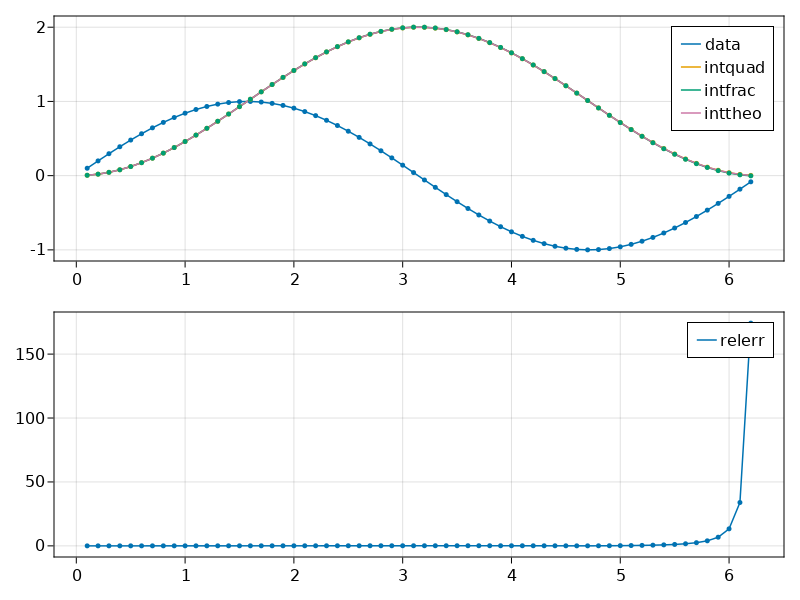

In [ ]:
using FractalTools
using QuadGK 
using CairoMakie

# Define function 
f(x) = [sin(x), cos(x)]

# Define integral 
intquadf(t) = quadgk(sin, 0, t) |> first |> first

# Define integration 
intfracf(t) = integrate(getdata(f, [[0.], [t]], 101), HInterp1D(0.001 * ones(2, 2)))

# Evaluations 
td = collect(0.1 : 0.1 : 2π) 
intvalfrac = intfracf.(td)
intvalquad = intquadf.(td) 
intvaltheo = 1 .- cos.(td)
relerr = abs.(intvalfrac - intvalquad) ./ abs.(intvalquad) * 100

# Plots 
fig = Figure() 
fig[1, 1] = ax1 = Axis(fig)
lines!(ax1, td, sin.(td), label="data")
lines!(ax1, td, intvalquad, label="intquad")
lines!(ax1, td, intvalfrac, label="intfrac")
lines!(ax1, td, intvaltheo, label="inttheo")
scatter!(ax1, td, sin.(td), markersize=5)
scatter!(ax1, td, intvalquad, markersize=5)
scatter!(ax1, td, intvalfrac, markersize=5)
fig[2, 1] = ax2 = Axis(fig) 
lines!(ax2, td, relerr, label="relerr")
scatter!(ax2, td, relerr, markersize=5)
axislegend(ax1)
axislegend(ax2)
fig 